
## PREDICT THE QUALITY OF RED *WINE*


### **PPT Link:**https://drive.google.com/file/d/1djnrG6idqeuxPZwktxUQ21x0-ciFcBwg/view?usp=sharing

IMPORTING THE LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

print("libraries are successfully imported")

libraries are successfully imported


READING THE DATA

In [ ]:
df = pd.read_csv('/content/winequality_red.csv')

In [ ]:
df.shape

(1599, 12)

 EXTRACTING THE TOP 5 ROWS

In [ ]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [ ]:
df.tail()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
# Iterate through all columns in the DataFrame
for column in df.columns:
    # Extract unique values for each column
    unique_values = df[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in fixed acidity: [ 7.4  7.8 11.2  7.9  7.3  7.5  6.7  5.6  8.9  8.5  8.1  7.6  6.9  6.3
  7.1  8.3  5.2  5.7  8.8  6.8  4.6  7.7  8.7  6.4  6.6  8.6 10.2  7.
  7.2  9.3  8.   9.7  6.2  5.   4.7  8.4 10.1  9.4  9.   8.2  6.1  5.8
  9.2 11.5  5.4  9.6 12.8 11.  11.6 12.  15.  10.8 11.1 10.  12.5 11.8
 10.9 10.3 11.4  9.9 10.4 13.3 10.6  9.8 13.4 10.7 11.9 12.4 12.2 13.8
  9.1 13.5 10.5 12.6 14.  13.7  9.5 12.7 12.3 15.6  5.3 11.3 13.   6.5
 12.9 14.3 15.5 11.7 13.2 15.9 12.1  5.1  4.9  5.9  6.   5.5]
Unique values in volatile acidity: [0.7   0.88  0.76  0.28  0.66  0.6   0.65  0.58  0.5   0.615 0.61  0.62
 0.56  0.59  0.32  0.22  0.39  0.43  0.49  0.4   0.41  0.71  0.645 0.675
 0.685 0.655 0.605 0.38  1.13  0.45  0.67  0.52  0.935 0.29  0.31  0.51
 0.42  0.63  0.69  0.735 0.725 0.705 0.785 0.75  0.625 0.3   0.55  1.02
 0.775 0.9   0.545 0.575 0.33  0.54  1.07  0.695 1.33  0.745 1.04  0.715
 0.415 0.34  0.68  0.95  0.53  0.64  0.885 0.805 0.73  0.37  0.835 1.09
 0.57  0.44 

In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
df.duplicated().sum()

240

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.shape

(1359, 12)

In [ ]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
5               7.4             0.660         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
1593            6.8             0.620         0.08             1.9      0.068   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
5                    13.0                  40.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1593                 28.0                  38.0  0.99651  3.42       0.82   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
5         9.4        5  
...       ...      ...  
1593      9.5        6  
1594     10.5        5  
1595     11.2        6  
1597     10.2        5  
1598     11.0        6  

[1359 rows x 12 columns]

DATA ANALYSIS AND VISUALIZATION

In [ ]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1359.000000       1359.000000  1359.000000     1359.000000   
mean        8.310596          0.529478     0.272333        2.523400   
std         1.736990          0.183031     0.195537        1.352314   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.430000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1359.000000          1359.000000           1359.000000  1359.000000   
mean      0.088124            15.893304             46.825975     0.996709   
std       0.049377            10.447270             33.408946     0.001869   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996700   
75%       0.091000            21.000000             63.000000     0.997820   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1359.000000  1359.000000  1359.000000  1359.000000  
mean      3.309787     0.658705    10.432315     5.623252  
std       0.155036     0.170667     1.082065     0.823578  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

PLOTTING GRAPHS FOR BETTER INSIGHT TO DATA DISTRIBUTION

In [ ]:
average_quality = df.groupby("quality").mean()
average_quality

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
3             8.360000          0.884500     0.171000        2.635000   
4             7.779245          0.693962     0.174151        2.694340   
5             8.171231          0.578596     0.244523        2.509532   
6             8.337383          0.496084     0.279364        2.457290   
7             8.858683          0.403653     0.371856        2.716766   
8             8.441176          0.427647     0.382941        2.576471   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality                                                                   
3         0.122500            11.000000             24.900000  0.997464   
4         0.090679            12.264151             36.245283  0.996542   
5         0.093971            17.161179             57.406412  0.997082   
6         0.085075            15.637383             40.816822  0.996565   
7         0.076832            13.994012             35.449102  0.996051   
8         0.068353            13.764706             34.470588  0.995095   

               pH  sulphates    alcohol  
quality                                  
3        3.398000   0.570000   9.955000  
4        3.381509   0.596415  10.265094  
5        3.300815   0.623570   9.888562  
6        3.318000   0.674542  10.658879  
7        3.290060   0.742635  11.491118  
8        3.274118   0.774706  12.158824

# **Univariate Analysis**

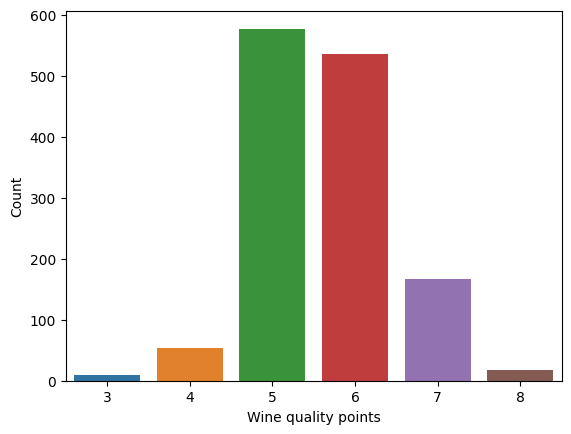

In [ ]:
# no. of values for each quality
sns.countplot(x=df['quality'],data=df)
plt.xlabel('Wine quality points')
plt.ylabel('Count')
plt.show()

# **Bivariate Analysis**

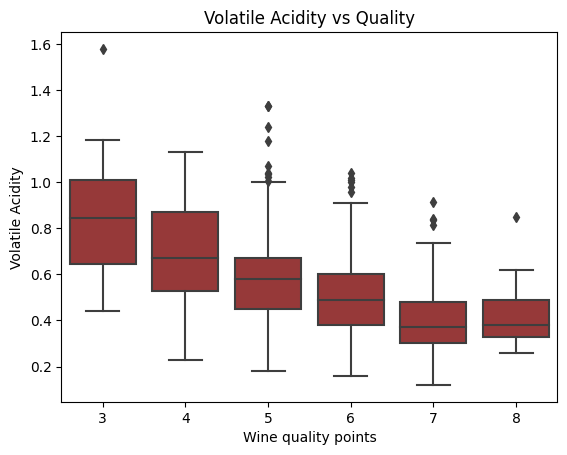

In [ ]:
sns.boxplot(x ='quality', y = 'volatile acidity', data=df,color='brown')
plt.title('Volatile Acidity vs Quality')
plt.xlabel('Wine quality points')
plt.ylabel('Volatile Acidity')
plt.show()

### THERE IS A 'DOWNING TREND' IN THE ABOVE PLOT

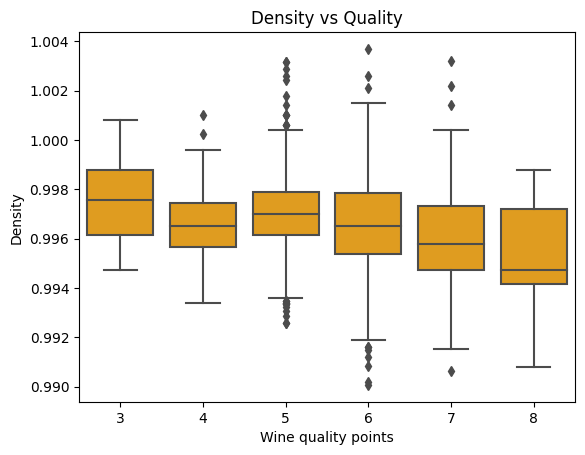

In [ ]:
sns.boxplot(x='quality', y= 'density',data=df,color='orange')
plt.title('Density vs Quality')
plt.xlabel('Wine quality points')
plt.ylabel('Density')
plt.show()

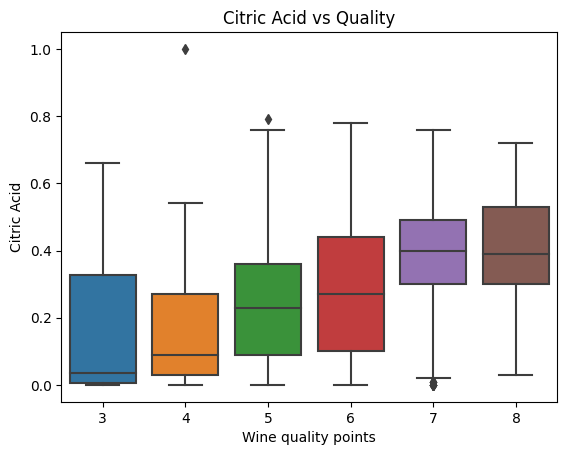

In [ ]:
sns.boxplot(x='quality', y= 'citric acid',data=df)
plt.title('Citric Acid vs Quality')
plt.xlabel('Wine quality points')
plt.ylabel('Citric Acid')
plt.show()

###there is a 'increasing trend ' in the above plot

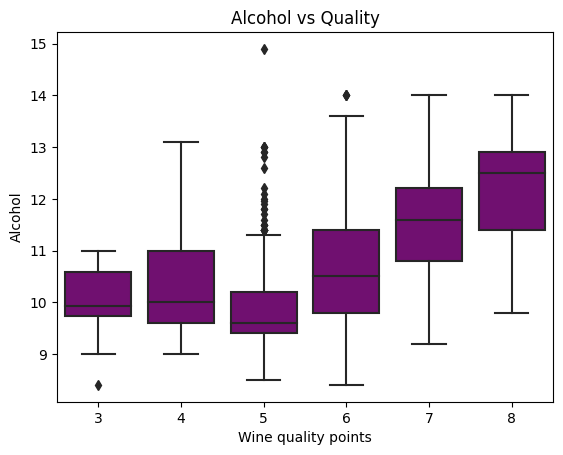

In [ ]:
sns.boxplot(x ='quality', y = 'alcohol', data=df,color='purple')
plt.title('Alcohol vs Quality')
plt.xlabel('Wine quality points')
plt.ylabel('Alcohol')
plt.show()

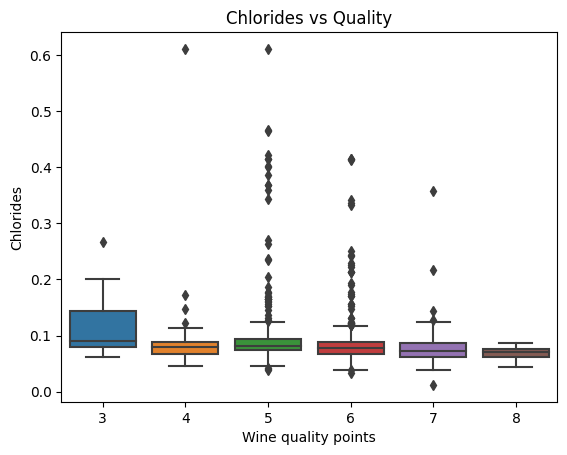

In [ ]:
sns.boxplot(x ='quality', y = 'chlorides', data=df)
plt.title('Chlorides vs Quality')
plt.xlabel('Wine quality points')
plt.ylabel('Chlorides')
plt.show()

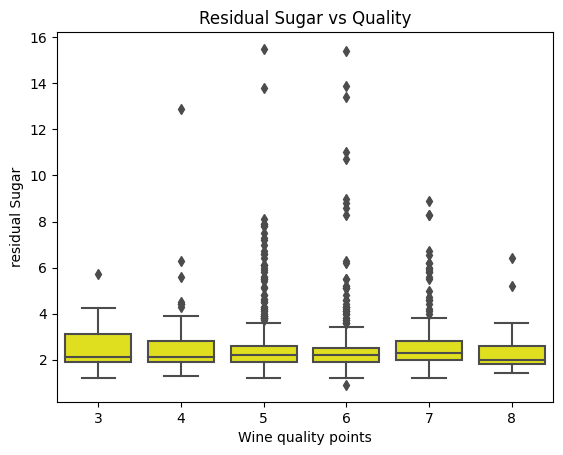

In [ ]:
sns.boxplot(x ='quality', y = 'residual sugar', data=df,color='yellow')
plt.title('Residual Sugar vs Quality')
plt.xlabel('Wine quality points')
plt.ylabel('residual Sugar')
plt.show()

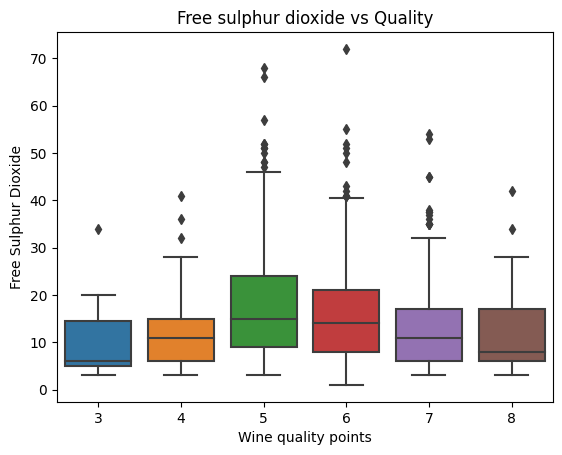

In [ ]:
sns.boxplot(x ='quality', y = 'free sulfur dioxide', data=df)
plt.title('Free sulphur dioxide vs Quality')
plt.xlabel('Wine quality points')
plt.ylabel('Free Sulphur Dioxide')
plt.show()

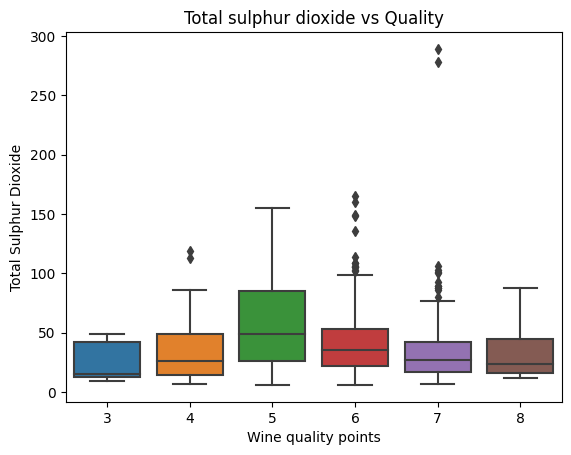

In [ ]:
sns.boxplot(x ='quality', y = 'total sulfur dioxide', data=df)
plt.title('Total sulphur dioxide vs Quality')
plt.xlabel('Wine quality points')
plt.ylabel('Total Sulphur Dioxide')
plt.show()

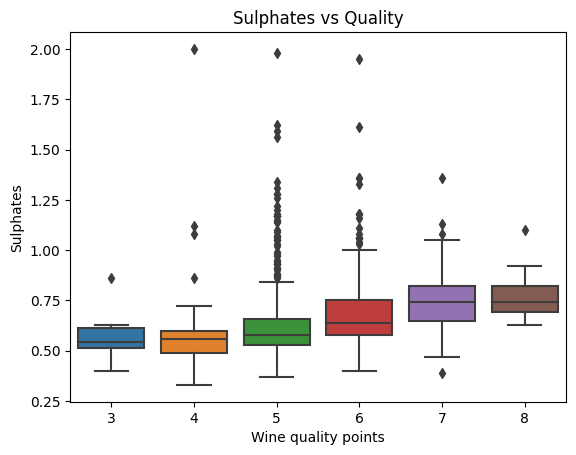

In [ ]:
sns.boxplot(x ='quality', y = 'sulphates', data=df)
plt.title('Sulphates vs Quality')
plt.xlabel('Wine quality points')
plt.ylabel('Sulphates')
plt.show()

###THERE IS AN 'INCREASING TREND' IN THE ABOVE PLOT

# **Multiariate Analysis**

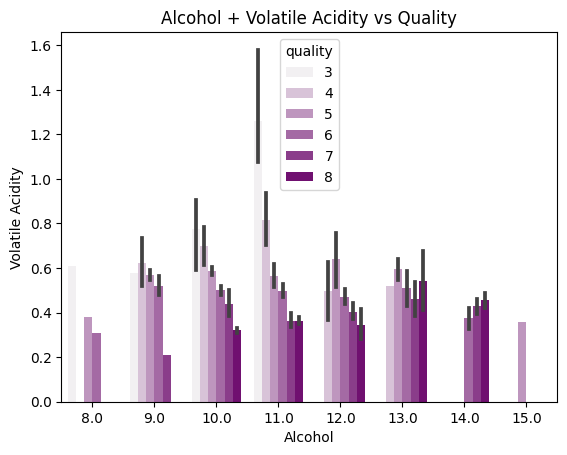

<Figure size 1200x1200 with 0 Axes>

In [ ]:
sns.barplot(data=df,x=round(df['alcohol']),y='volatile acidity',hue='quality',color='purple')
plt.title('Alcohol + Volatile Acidity vs Quality')
plt.xlabel('Alcohol')
plt.ylabel('Volatile Acidity')
plt.figure(figsize =(12, 12))
plt.show()

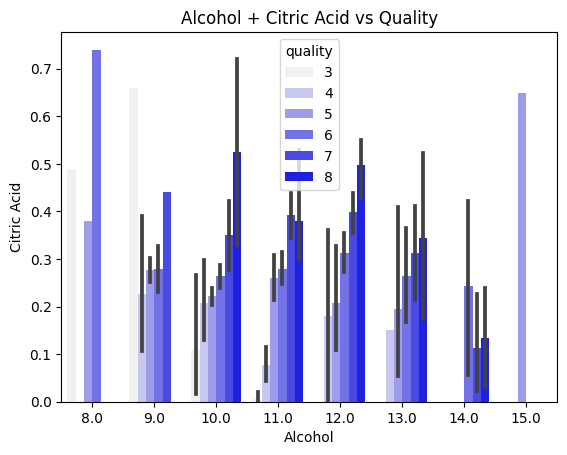

<Figure size 1200x1200 with 0 Axes>

In [ ]:
sns.barplot(data=df,x=round(df['alcohol']),y='citric acid',hue='quality',color='blue')
plt.title('Alcohol + Citric Acid vs Quality')
plt.xlabel('Alcohol')
plt.ylabel('Citric Acid')
plt.figure(figsize =(12, 12))
plt.show()

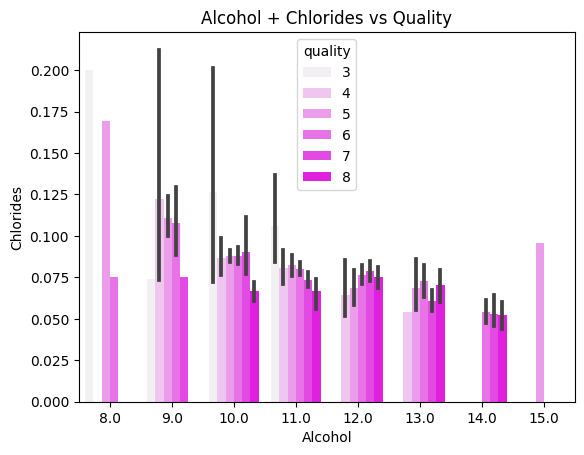

<Figure size 1200x1200 with 0 Axes>

In [ ]:
sns.barplot(data=df,x=round(df['alcohol']),y='chlorides',hue='quality',color='magenta')
plt.title('Alcohol + Chlorides vs Quality')
plt.xlabel('Alcohol')
plt.ylabel('Chlorides')
plt.figure(figsize =(12, 12))
plt.show()

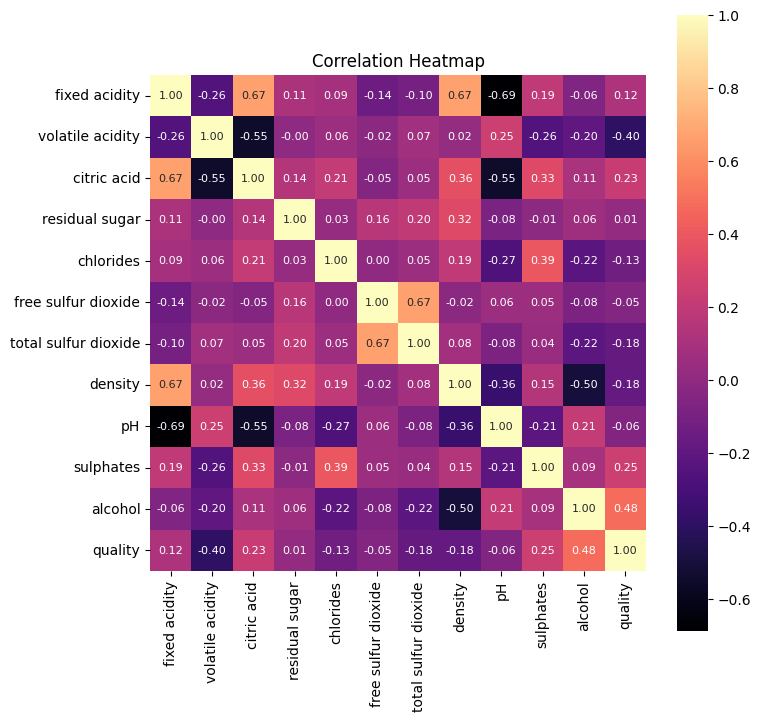

In [ ]:
#constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),  square=True, annot_kws={'size':8}, fmt=".2f", cmap='magma', annot=True, cbar=True)
plt.title('Correlation Heatmap')
plt.show()

*   Correlation heatmaps are used to analyze the correlation between different variables in a dataset.

Interpreting the heatmap:

*  Values close to 1 indicate a strong positive correlation.
*  Values close to -1 indicate a strong negative correlation.
*   Values close to 0 indicate a weak or no correlation.

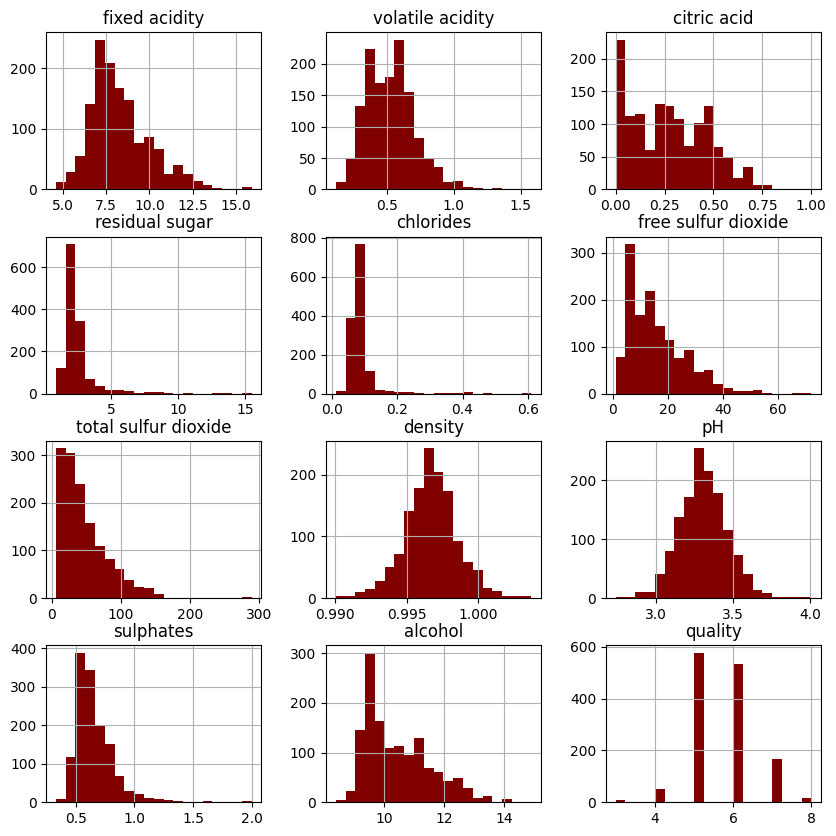

In [ ]:
#constructing a hist to understand the range
df.hist(bins=20,figsize=(10,10),color='maroon')
plt.show()

<Figure size 800x800 with 0 Axes>

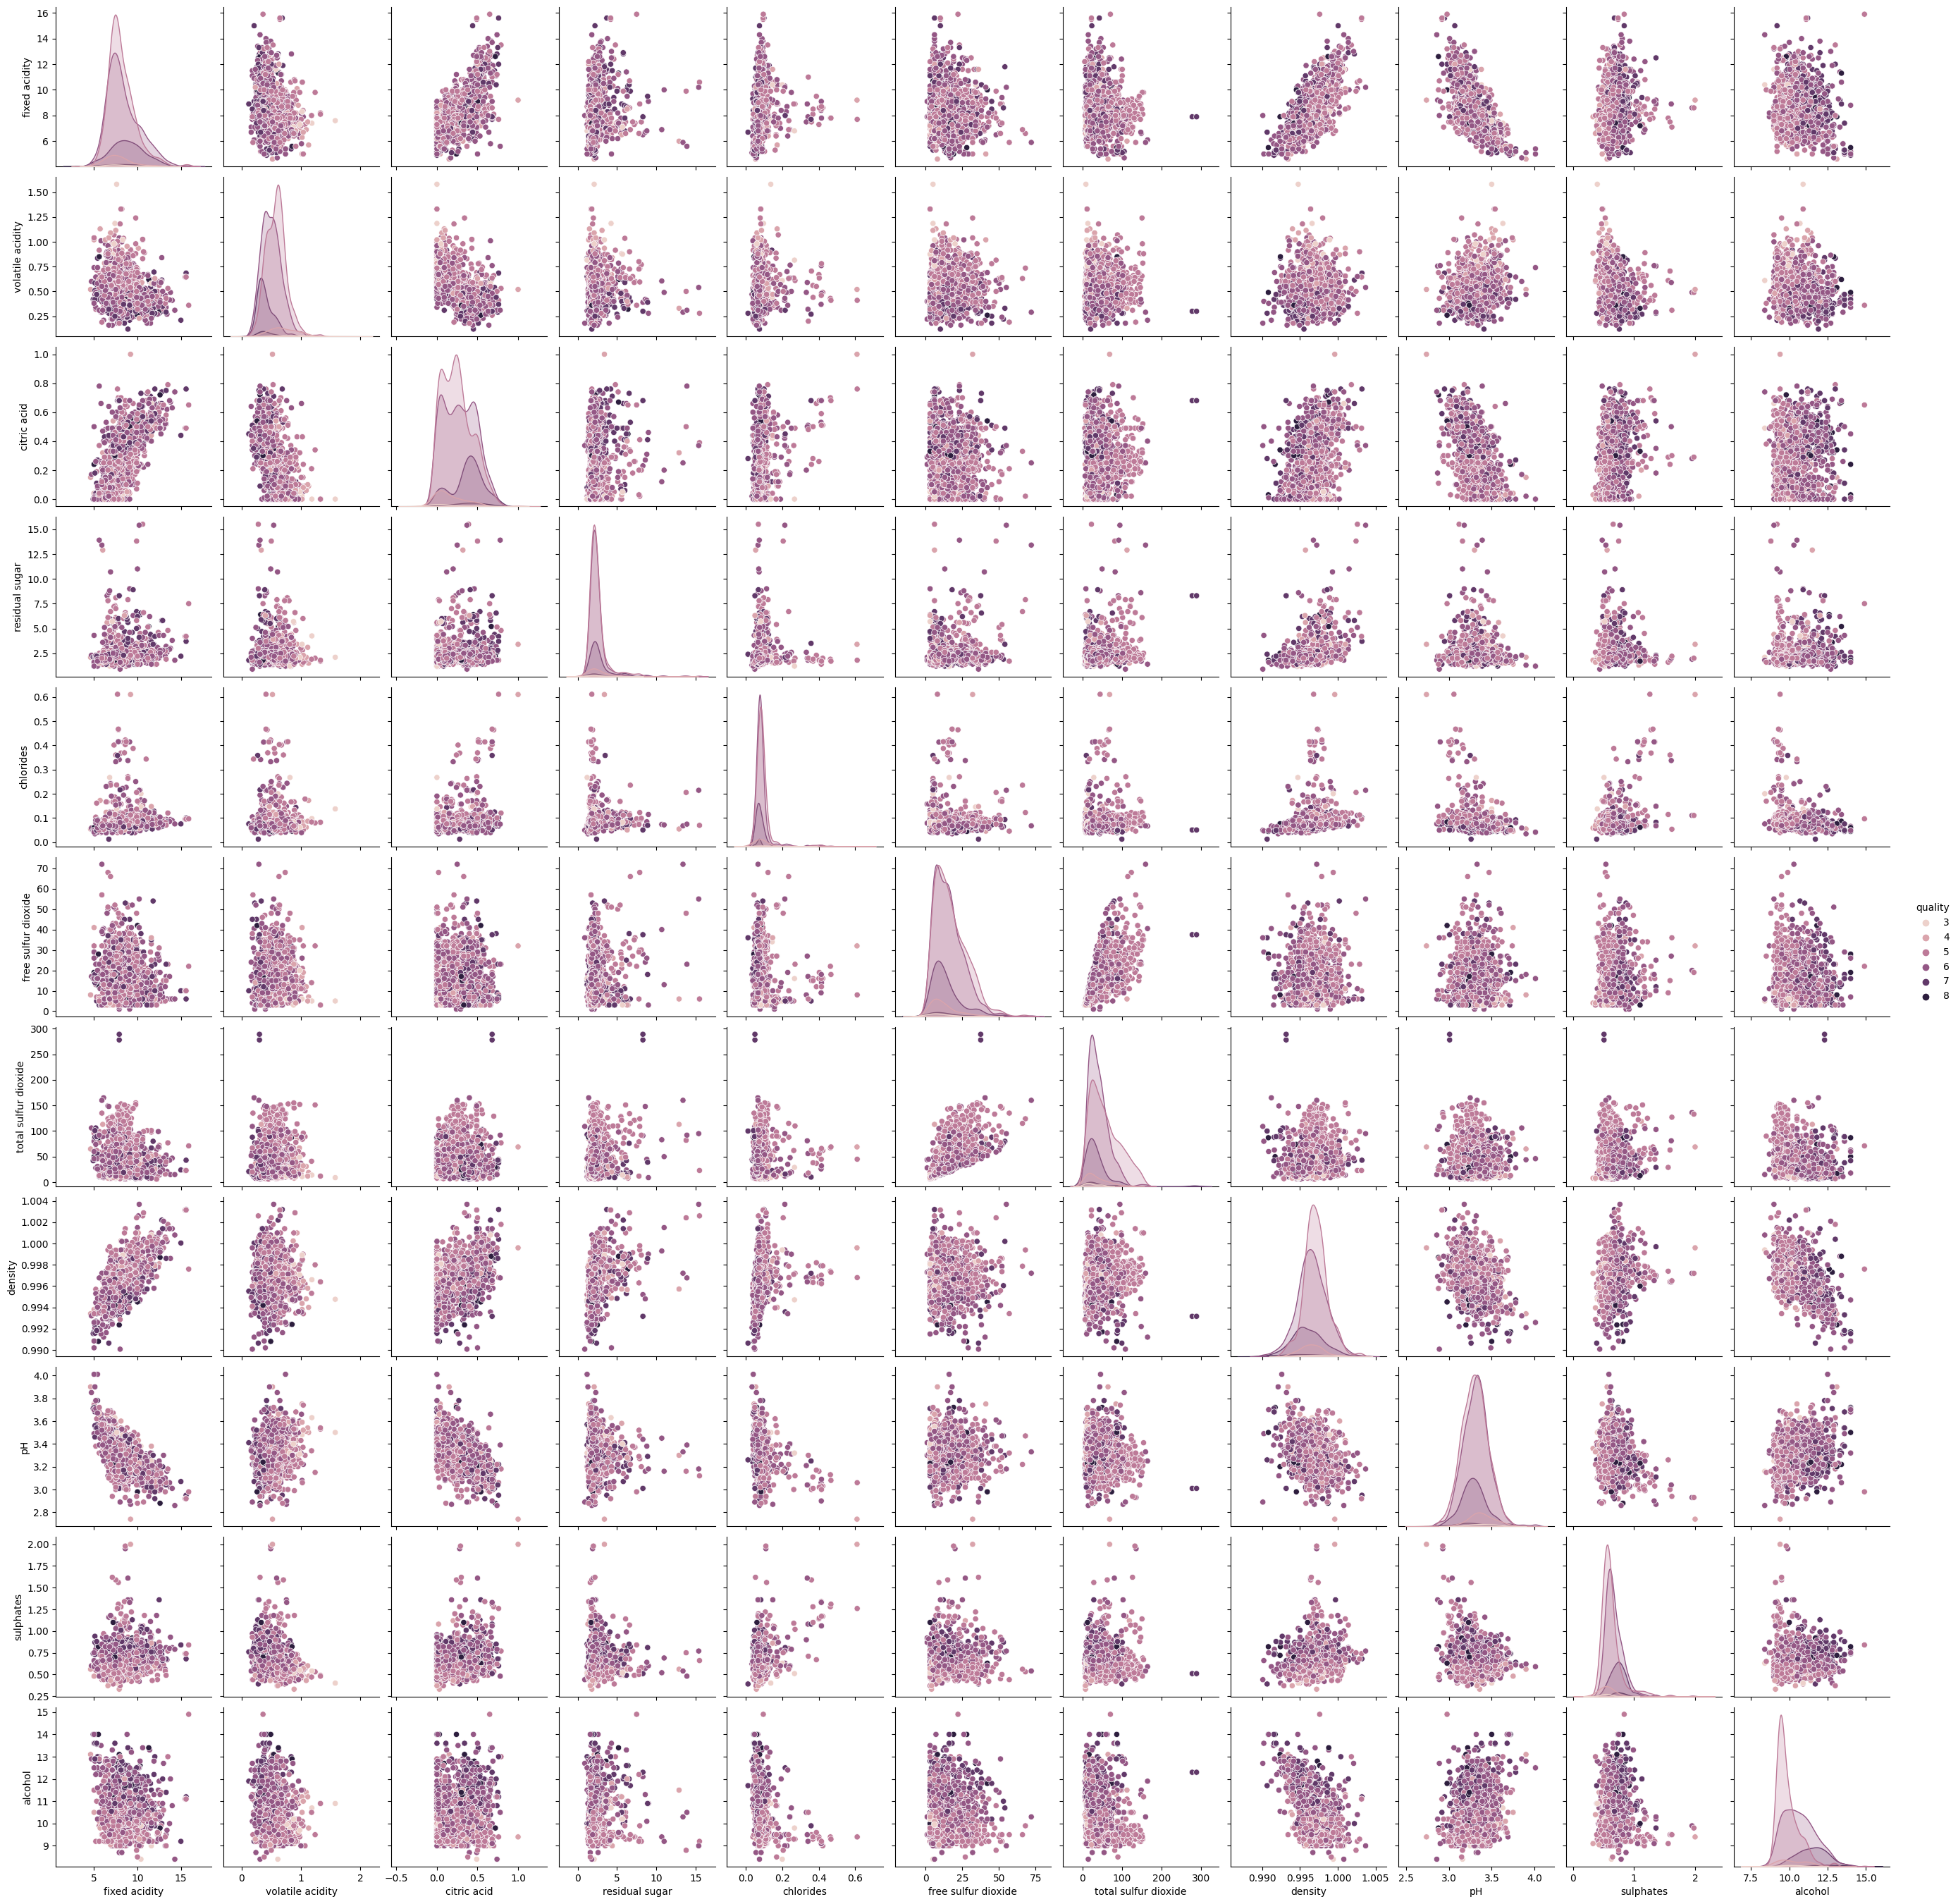

<Figure size 800x800 with 0 Axes>

In [ ]:
#constructing a pairplot to understand the relation between multiple variables
sns.pairplot(df,hue='quality')
plt.figure(figsize=(8,8))

# **Pre processing data for ML algorithm**

In [ ]:
df['quality'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

In [ ]:
df['quality']=df['quality'].apply(lambda x: 1 if x>5 else 0)
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        0  
1      9.8        0  
2      9.8        0  
3      9.8        1  
5      9.4        0

In [ ]:
df['quality'].value_counts()

1    719
0    640
Name: quality, dtype: int64

# **Model Building**

# Spiltting Data

In [ ]:
X = df.drop(['quality'] , axis = 1 )
y = df['quality']

In [ ]:
#Checking for Mutlicollinearity
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif.sort_values(by = "VIF", ascending = False)

    return(vif)

In [ ]:
#Printing the VIF values
calc_vif(X)

variables          VIF
7                density  1500.387873
8                     pH  1095.732046
10               alcohol   123.097449
0          fixed acidity    75.023032
9              sulphates    21.946341
1       volatile acidity    16.460387
2            citric acid     9.188892
6   total sulfur dioxide     6.543918
5    free sulfur dioxide     6.432241
4              chlorides     6.349793
3         residual sugar     4.915733

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
y = df['quality']
X = df.drop('quality', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# **Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [ ]:
model1 = DecisionTreeClassifier()
model1.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = model1.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,

In [ ]:
from sklearn import metrics

accuracy= metrics.accuracy_score(y_test,y_pred)
confusion_matrix= metrics.confusion_matrix(y_test,y_pred)
classification_report= metrics.classification_report(y_test,y_pred)

print('Accuracy: ',accuracy)
print('Confusion matrix:\n',confusion_matrix)
print('Classification report:\n',classification_report)

Accuracy:  0.6869747899159664
Confusion matrix:
 [[144  79]
 [ 70 183]]
Classification report:
               precision    recall  f1-score   support

           0       0.67      0.65      0.66       223
           1       0.70      0.72      0.71       253

    accuracy                           0.69       476
   macro avg       0.69      0.68      0.68       476
weighted avg       0.69      0.69      0.69       476



# **Naive Bayes Classsifier**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred = gnb.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,

In [ ]:
from sklearn import metrics

accuracy= metrics.accuracy_score(y_test,y_pred)
confusion_matrix= metrics.confusion_matrix(y_test,y_pred)
classification_report= metrics.classification_report(y_test,y_pred)

print('Accuracy: ',accuracy)
print('Confusion matrix:\n',confusion_matrix)
print('Classification report:\n',classification_report)

Accuracy:  0.7542016806722689
Confusion matrix:
 [[167  56]
 [ 61 192]]
Classification report:
               precision    recall  f1-score   support

           0       0.73      0.75      0.74       223
           1       0.77      0.76      0.77       253

    accuracy                           0.75       476
   macro avg       0.75      0.75      0.75       476
weighted avg       0.75      0.75      0.75       476



# **SVC**

In [ ]:
from sklearn import svm
from sklearn import metrics

In [ ]:
svc= svm.SVC(kernel = 'linear')
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = svc.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,

In [ ]:
from sklearn import metrics

accuracy= metrics.accuracy_score(y_test,y_pred)
confusion_matrix= metrics.confusion_matrix(y_test,y_pred)
classification_report= metrics.classification_report(y_test,y_pred)

print('Accuracy: ',accuracy)
print('Confusion matrix:\n',confusion_matrix)
print('Classification report:\n',classification_report)

Accuracy:  0.7563025210084033
Confusion matrix:
 [[168  55]
 [ 61 192]]
Classification report:
               precision    recall  f1-score   support

           0       0.73      0.75      0.74       223
           1       0.78      0.76      0.77       253

    accuracy                           0.76       476
   macro avg       0.76      0.76      0.76       476
weighted avg       0.76      0.76      0.76       476



# **KNN Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [ ]:
model = KNeighborsClassifier(n_neighbors = 5)
model.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred = svc.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,

In [ ]:
from sklearn import metrics

accuracy= metrics.accuracy_score(y_test,y_pred)
confusion_matrix= metrics.confusion_matrix(y_test,y_pred)
classification_report= metrics.classification_report(y_test,y_pred)

print('Accuracy: ',accuracy)
print('Confusion matrix:\n',confusion_matrix)
print('Classification report:\n',classification_report)

Accuracy:  0.7563025210084033
Confusion matrix:
 [[168  55]
 [ 61 192]]
Classification report:
               precision    recall  f1-score   support

           0       0.73      0.75      0.74       223
           1       0.78      0.76      0.77       253

    accuracy                           0.76       476
   macro avg       0.76      0.76      0.76       476
weighted avg       0.76      0.76      0.76       476



# **Logistic Classification**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
model2 = LogisticRegression()
model2.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = model2.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,

In [ ]:
from sklearn import metrics

accuracy= metrics.accuracy_score(y_test,y_pred)
confusion_matrix= metrics.confusion_matrix(y_test,y_pred)
classification_report= metrics.classification_report(y_test,y_pred)

print('Accuracy: ',accuracy)
print('Confusion matrix:\n',confusion_matrix)
print('Classification report:\n',classification_report)

Accuracy:  0.7542016806722689
Confusion matrix:
 [[165  58]
 [ 59 194]]
Classification report:
               precision    recall  f1-score   support

           0       0.74      0.74      0.74       223
           1       0.77      0.77      0.77       253

    accuracy                           0.75       476
   macro avg       0.75      0.75      0.75       476
weighted avg       0.75      0.75      0.75       476



# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [ ]:
model3= RandomForestClassifier(n_estimators=100, random_state=43)
model3.fit(X_train, y_train)

RandomForestClassifier(random_state=43)

In [ ]:
y_pred = model3.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,

In [ ]:
from sklearn import metrics

accuracy= metrics.accuracy_score(y_test,y_pred)
confusion_matrix= metrics.confusion_matrix(y_test,y_pred)
classification_report= metrics.classification_report(y_test,y_pred)

print('Accuracy: ',accuracy)
print('Confusion matrix:\n',confusion_matrix)
print('Classification report:\n',classification_report)

Accuracy:  0.7689075630252101
Confusion matrix:
 [[159  64]
 [ 46 207]]
Classification report:
               precision    recall  f1-score   support

           0       0.78      0.71      0.74       223
           1       0.76      0.82      0.79       253

    accuracy                           0.77       476
   macro avg       0.77      0.77      0.77       476
weighted avg       0.77      0.77      0.77       476



# **XG Boost**

In [ ]:
from xgboost import XGBClassifier
from sklearn import metrics

In [ ]:
# Create an XGBoost classifier with desired hyperparameters
xgb_classifier = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=10)
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=10, ...)

In [ ]:
y_pred = xgb_classifier.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,

In [ ]:
from sklearn import metrics

accuracy= metrics.accuracy_score(y_test,y_pred)
confusion_matrix= metrics.confusion_matrix(y_test,y_pred)
classification_report= metrics.classification_report(y_test,y_pred)

print('Accuracy: ',accuracy)
print('Confusion matrix:\n',confusion_matrix)
print('Classification report:\n',classification_report)

Accuracy:  0.7605042016806722
Confusion matrix:
 [[159  64]
 [ 50 203]]
Classification report:
               precision    recall  f1-score   support

           0       0.76      0.71      0.74       223
           1       0.76      0.80      0.78       253

    accuracy                           0.76       476
   macro avg       0.76      0.76      0.76       476
weighted avg       0.76      0.76      0.76       476



**ADA**-**BOOST**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
weak_learner = DecisionTreeClassifier(max_depth=1)


In [ ]:
adaboost_classifier = AdaBoostClassifier(base_estimator=weak_learner, n_estimators=50, random_state=42)
adaboost_classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [ ]:
y_pred = adaboost_classifier.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,

In [ ]:
from sklearn import metrics

accuracy= metrics.accuracy_score(y_test,y_pred)
confusion_matrix= metrics.confusion_matrix(y_test,y_pred)
classification_report= metrics.classification_report(y_test,y_pred)

print('Accuracy: ',accuracy)
print('Confusion matrix:\n',confusion_matrix)
print('Classification report:\n',classification_report)

Accuracy:  0.75
Confusion matrix:
 [[153  70]
 [ 49 204]]
Classification report:
               precision    recall  f1-score   support

           0       0.76      0.69      0.72       223
           1       0.74      0.81      0.77       253

    accuracy                           0.75       476
   macro avg       0.75      0.75      0.75       476
weighted avg       0.75      0.75      0.75       476



**BAGGING**

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [ ]:
bagging_model = BaggingClassifier(n_estimators=50, random_state=42)
bagging_model.fit(X_train, y_train)


BaggingClassifier(n_estimators=50, random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = bagging_model.predict(X_test)
y_pred


array([0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,

In [ ]:
from sklearn import metrics

accuracy= metrics.accuracy_score(y_test,y_pred)
confusion_matrix= metrics.confusion_matrix(y_test,y_pred)
classification_report= metrics.classification_report(y_test,y_pred)

print('Accuracy: ',accuracy)
print('Confusion matrix:\n',confusion_matrix)
print('Classification report:\n',classification_report)

Accuracy:  0.7563025210084033
Confusion matrix:
 [[158  65]
 [ 51 202]]
Classification report:
               precision    recall  f1-score   support

           0       0.76      0.71      0.73       223
           1       0.76      0.80      0.78       253

    accuracy                           0.76       476
   macro avg       0.76      0.75      0.75       476
weighted avg       0.76      0.76      0.76       476



# **Neural Network**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history=model.fit(X_train, y_train, epochs=100, batch_size=30, validation_data=(X_test,y_test),verbose=2)


Epoch 1/100
37/37 - 1s - loss: 0.6520 - accuracy: 0.6173 - val_loss: 0.5564 - val_accuracy: 0.7132 - 996ms/epoch - 27ms/step
Epoch 2/100
37/37 - 0s - loss: 0.5473 - accuracy: 0.7213 - val_loss: 0.4976 - val_accuracy: 0.7647 - 109ms/epoch - 3ms/step
Epoch 3/100
37/37 - 0s - loss: 0.5261 - accuracy: 0.7387 - val_loss: 0.4827 - val_accuracy: 0.7721 - 111ms/epoch - 3ms/step
Epoch 4/100
37/37 - 0s - loss: 0.5157 - accuracy: 0.7341 - val_loss: 0.4792 - val_accuracy: 0.7757 - 104ms/epoch - 3ms/step
Epoch 5/100
37/37 - 0s - loss: 0.5081 - accuracy: 0.7424 - val_loss: 0.4779 - val_accuracy: 0.7757 - 116ms/epoch - 3ms/step
Epoch 6/100
37/37 - 0s - loss: 0.5029 - accuracy: 0.7424 - val_loss: 0.4763 - val_accuracy: 0.7721 - 101ms/epoch - 3ms/step
Epoch 7/100
37/37 - 0s - loss: 0.4968 - accuracy: 0.7599 - val_loss: 0.4741 - val_accuracy: 0.7684 - 108ms/epoch - 3ms/step
Epoch 8/100
37/37 - 0s - loss: 0.4936 - accuracy: 0.7617 - val_loss: 0.4749 - val_accuracy: 0.7610 - 104ms/epoch - 3ms/step
Epoch 9

In [ ]:
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy}")

9/9 [==============================] - 0s 2ms/step
Accuracy: 0.7205882352941176


In [ ]:
from sklearn import metrics
print("Classification Report:",metrics.classification_report(y_test, y_pred_binary))


Classification Report:               precision    recall  f1-score   support

           0       0.73      0.69      0.71       135
           1       0.71      0.75      0.73       137

    accuracy                           0.72       272
   macro avg       0.72      0.72      0.72       272
weighted avg       0.72      0.72      0.72       272



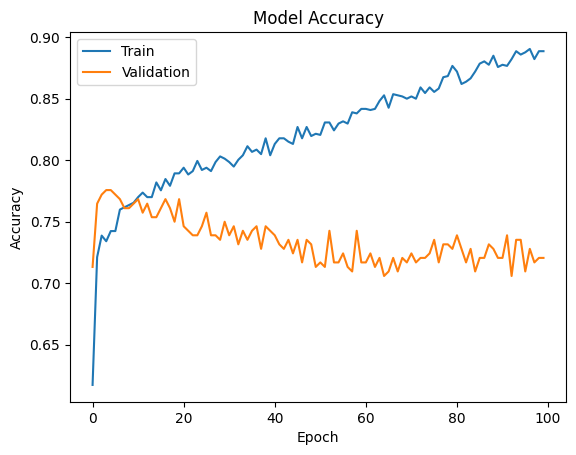

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

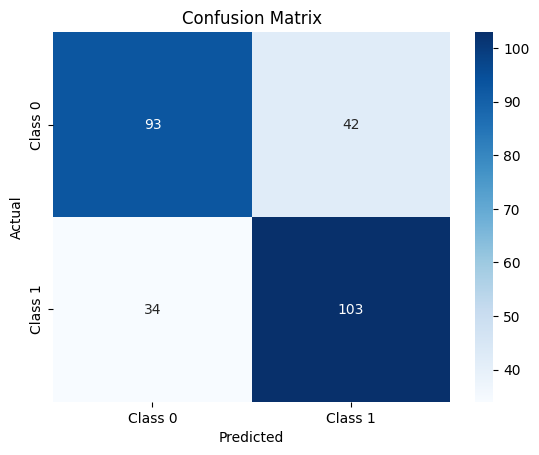

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred_binary)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

